# Day04_Einsum

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Method" data-toc-modified-id="Method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Method</a></span><ul class="toc-item"><li><span><a href="#1.-Transpose" data-toc-modified-id="1.-Transpose-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1. Transpose</a></span></li><li><span><a href="#Diagonal" data-toc-modified-id="Diagonal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Diagonal</a></span></li><li><span><a href="#Trace" data-toc-modified-id="Trace-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Trace</a></span></li><li><span><a href="#MATRIX-MULTIPLICATION" data-toc-modified-id="MATRIX-MULTIPLICATION-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>MATRIX MULTIPLICATION</a></span></li><li><span><a href="#Hadamard(element-wise)-product" data-toc-modified-id="Hadamard(element-wise)-product-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Hadamard(element-wise) product</a></span></li><li><span><a href="#Batched-Matrix-Multiplication" data-toc-modified-id="Batched-Matrix-Multiplication-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Batched Matrix Multiplication</a></span></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#Example-1:-Filtering" data-toc-modified-id="Example-1:-Filtering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Example 1: Filtering</a></span></li><li><span><a href="#Example-2:-Gradient-Descent" data-toc-modified-id="Example-2:-Gradient-Descent-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example 2: Gradient Descent</a></span></li></ul></li><li><span><a href="#Multi-head-Attention" data-toc-modified-id="Multi-head-Attention-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multi-head Attention</a></span></li></ul></div>

## Introduction 

**Einstein summation (einsum)** is implemented in numpy, as well as deep learning libraries such as Pytorch and TensorFlow.


Einsum notation is an elegant way to express the atrix-matrix multiplications, as well as complex operations on tensors, using essentially a domain-specific language. 

When we handle the Deep Leaning model, we often encounter a problem is applying a transformation to vectors in a higher-order tensor. In this situation, Einsum can be a solution for us. 


## Method


- Pros:
    - Domain Specific Language
- Cons:
    - Slow ?!... **TODO...**


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])


def show_before_after(A: np, query: str) -> None:
    AA = np.einsum(query, A)

    print(f'Query: {query}')
    print(' ')
    print(f'Before: A {A.shape}')
    print(A)
    print(' ')
    print(f'After: A {AA.shape}')
    print(AA)

### 1. Transpose

In [2]:
A = np.array([[1,2,3], [4,5,6]])
query = "ij->ji"

show_before_after(A, query)

Query: ij->ji
 
Before: A (2, 3)
[[1 2 3]
 [4 5 6]]
 
After: A (3, 2)
[[1 4]
 [2 5]
 [3 6]]


In [3]:
np.reshape(A, (3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

### Diagonal

In [4]:
A =  np.eye(3)
query = "ii->i"

show_before_after(A, query)

Query: ii->i
 
Before: A (3, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 
After: A (3,)
[1. 1. 1.]


In [5]:
np.diag(A)

array([1., 1., 1.])

### Trace

In [6]:
A =  np.eye(3)
query = "ii->"

show_before_after(A, query)

Query: ii->
 
Before: A (3, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 
After: A ()
3.0


In [7]:
np.diag(A).sum()

3.0

### MATRIX MULTIPLICATION

In [8]:
# np.random.randint(min_val,max_val,(<num_rows>,<num_cols>))
A = np.random.randint(1,10, (2, 3))
B = np.random.randint(1,10, (3, 2))



In [9]:
print(A)
print(B)

[[8 8 1]
 [8 6 7]]
[[9 2]
 [5 9]
 [1 2]]


In [10]:
multiplication = np.einsum('ij,jk-> ik ', A, B )

print(multiplication)
print(A@B) # another: np.matmul 

[[113  90]
 [109  84]]
[[113  90]
 [109  84]]


### Hadamard(element-wise) product

$R_{ij} = A_{ij}B_{ij}$
    
    

In [11]:
A = np.random.randint(1,10, (2, 2))
B = np.random.randint(1,10, (2, 2))

Hadamard = np.einsum('ij,ij-> ij', A, B )

print(Hadamard)
print(A*B)

[[30  6]
 [72 72]]
[[30  6]
 [72 72]]


### Batched Matrix Multiplication 

In [12]:
A = np.random.randint(1,10, (3, 2, 5))
B = np.random.randint(1,10, (3, 5, 3))

batch_m = np.einsum('ijk,ikl-> ijl', A, B )
print(batch_m.shape)
print(batch_m)

(3, 2, 3)
[[[137  76  76]
  [115  67 157]]

 [[ 94  67 107]
  [ 91  83 106]]

 [[ 27  32  25]
  [109 141 115]]]


## Examples

### Example 1: Filtering 


``` python 

def conv2d_without_for_loop(self):
    """

    """
    # Generation of the submatrices
    sub_shape = self._kernel.shape
    view_shape = tuple(np.subtract(
        self._pad_src_img.shape, sub_shape) + 1) + sub_shape
    strides = self._pad_src_img.strides + self._pad_src_img.strides

    stretched_matrix = np.lib.stride_tricks.as_strided(
        self._pad_src_img, view_shape, strides)
    return np.einsum('ij,klij->kl', self._kernel, stretched_matrix)

def conv2dp(self):
    # do the filtering
    for i in range(height, roi.shape[1]-height):
        for j in range(width, roi.shape[0]-width):
            # how do you create the output of the filtering?
            filtered[j, i] = np.multiply(
                roi[(j-width):(j+width)+1, (i-height):(i+height)+1], weights).sum()

```

### Example 2: Gradient Descent




<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}



In [13]:
def cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [14]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
    

In [15]:
def show_results(X,y, theta_best,cost_history,theta_history):
    #################################
    # 1. predcit 
    #################################
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_predict = X_new_b.dot(theta_best)


    #################################
    # 2. report
    #################################
    # 2-2 learning curve
    fig,ax = plt.subplots(figsize=(12,8))
    ax.set_ylabel('J(Theta)')
    ax.set_xlabel('Iterations')
    plt.title('Learing Curve', fontsize=18)
    _=ax.plot(range(n_iter),cost_history,'b.')
    plt.show()
    
    # 2-3 total results with the original data 
    plt.figure(figsize=(12,8))
    plt.title('After Regression \nTheta0:{:0.3f}|Theta1:{:0.3f}|MSE:{:0.3f}'.format(theta[0][0],
                                                                                        theta[1][0],
                                                                                        cost_history[-1]
                                                                                       ),
                                                                                        
                                                                                        fontsize=20)
    plt.plot(X_new,y_predict,'r-')
    plt.plot(X,y,'b.')
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    _ =plt.axis([0,2,0,15])
    plt.show()

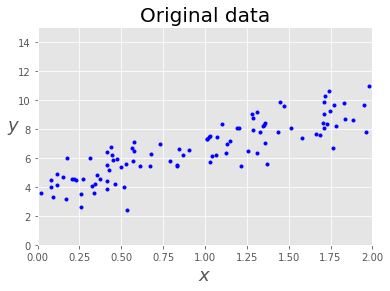

In [16]:
# data 
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# plotting the original data
plt.title('Original data', fontsize=20)
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [17]:
# init variables
lr =0.01
n_iter = 1000

X_b = np.c_[np.ones((len(X),1)),X]
init_theta = np.random.randn(2,1)

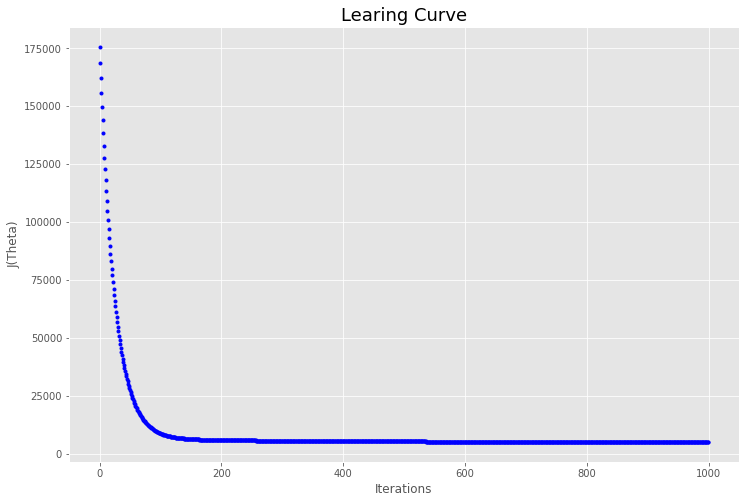

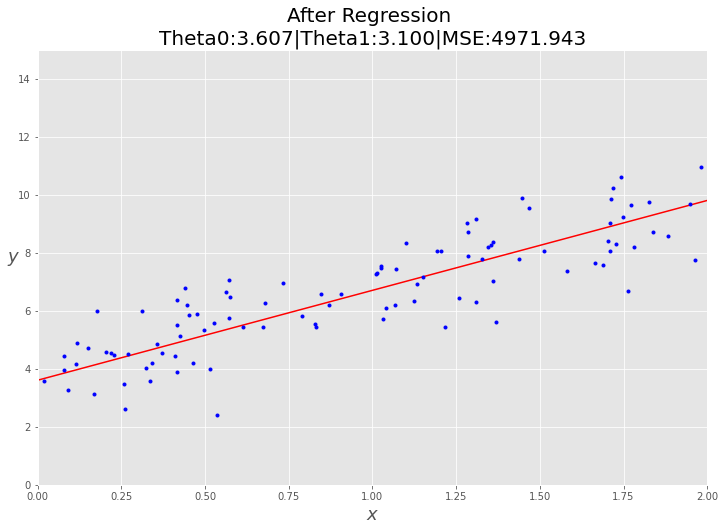

In [18]:
theta,cost_history,theta_history = gradient_descent(X_b,y,init_theta,lr,n_iter)
show_results(X,y, theta,cost_history,theta_history)

In [19]:
def gradient_descent_einsum(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    for it in range(iterations):
        
        # prediction = np.dot(X,theta)
#         prediction =  '''code'''

        
#         theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
#         theta = '''code'''

        
        
        theta_history[it,:] = theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    

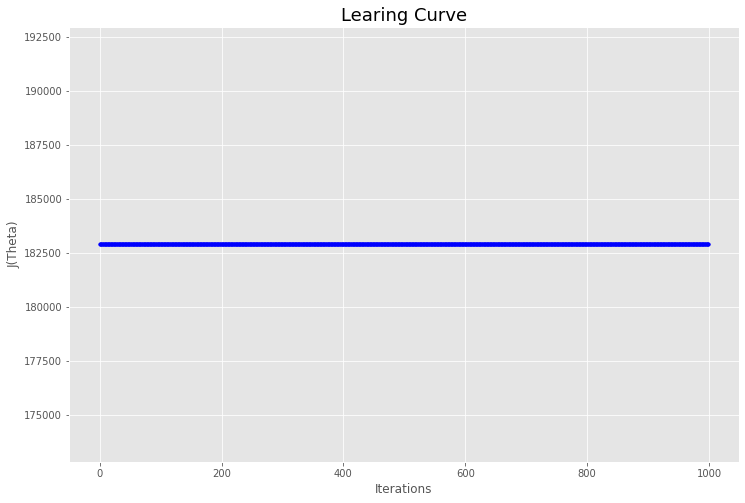

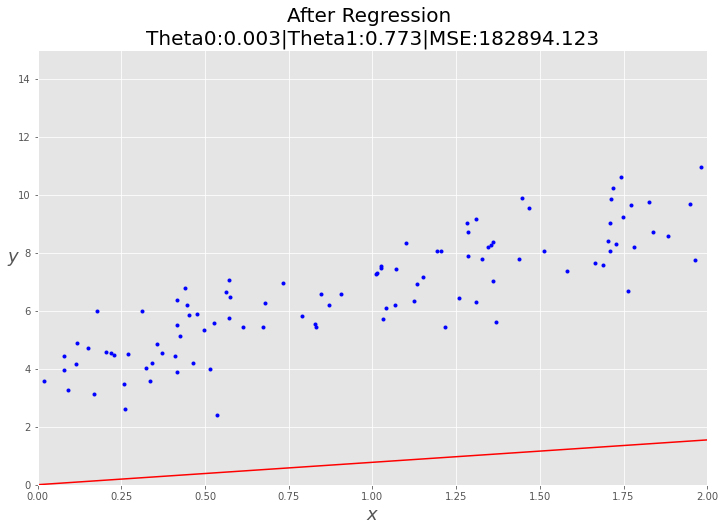

In [20]:
theta,cost_history,theta_history = gradient_descent_einsum(X_b,y,init_theta,lr,n_iter)
show_results(X,y, theta,cost_history,theta_history)


## Multi-head Attention

$\text{MultiHeadAttention}(K,Q,V) = \text{concat}(head_1, head_2, head_3, ...)$

$head_i = \text{Attention}(QW^Q_i, KW^K_i, VW^V_i)$ 

$\text{Attention}(Q,K,V) = \text{softmax}(\frac{QK^{\top}}{\sqrt{d_k}})V$


In [21]:
from scipy.special import softmax

def multihead_attention(hidden_states, W_Q, W_K, W_V, num_head):
    batch_size, sequence_length, hidden_size = hidden_states.shape
    assert hidden_size % num_head == 0
    head_hidden_size = hidden_size // num_head

    Q = np.einsum("ijk,kl->ijl", hidden_states, W_Q)   # [batch_size, sequence_length, hidden_size]
    K = np.einsum("ijk,kl->ijl", hidden_states, W_K)   # [batch_size, sequence_length, hidden_size]
    V = np.einsum("ijk,kl->ijl", hidden_states, W_V)   # [batch_size, sequence_length, hidden_size]
    print(f"Q shape: {Q.shape} K shape: {K.shape} V shape: {V.shape}")

    Q = np.reshape(Q, [batch_size, sequence_length, num_head, head_hidden_size]) # [batch_size, sequence_length, num_haed, head_hidden_size]
    K = np.reshape(K, [batch_size, sequence_length, num_head, head_hidden_size]) # [batch_size, sequence_length, num_haed, head_hidden_size]
    V = np.reshape(V, [batch_size, sequence_length, num_head, head_hidden_size]) # [batch_size, sequence_length, num_haed, head_hidden_size]
    print(f"Q shape: {Q.shape} K shape: {K.shape} V shape: {V.shape}")

    Q = np.einsum("ijkl->ikjl", Q)  # [batch_size, num_haed, sequence_length, head_hidden_size]
    K = np.einsum("ijkl->ikjl", K)  # [batch_size, num_haed, sequence_length, head_hidden_size]
    V = np.einsum("ijkl->ikjl", V)  # [batch_size, num_haed, sequence_length, head_hidden_size]
    print(f"Q shape: {Q.shape} K shape: {K.shape} V shape: {V.shape}")

    attention_score = np.einsum("ijkl,ijml->ijkm", Q, K)/np.sqrt(hidden_size)  # [batch_size, num_haed, sequence_length, sequence_length]
    attention_score = softmax(attention_score, axis=3)   # [batch_size, num_haed, sequence_length, sequence_length]
    print(f"Attention score shape: {attention_score.shape}")

    attention_result = np.einsum("ijkl,ijkm->iljm", attention_score, V)   # [batch_size, sequence_length, num_head, head_hidden_size]
    attention_result = np.reshape(attention_result, [batch_size, sequence_length, hidden_size])  # [batch_size, sequence_length, hidden_size]
    print(f"Attention result shape: {attention_result.shape}")

    return attention_result

In [22]:
batch_size, sequence_length, hidden_size, num_head = 2, 10, 16, 8
hidden_states = np.random.uniform(size=(batch_size, sequence_length, hidden_size))

W_K = np.random.uniform(size=(hidden_size, hidden_size))
W_Q = np.random.uniform(size=(hidden_size, hidden_size))
W_V = np.random.uniform(size=(hidden_size, hidden_size))

result = multihead_attention(hidden_states, W_Q, W_K, W_V, num_head)

Q shape: (2, 10, 16) K shape: (2, 10, 16) V shape: (2, 10, 16)
Q shape: (2, 10, 8, 2) K shape: (2, 10, 8, 2) V shape: (2, 10, 8, 2)
Q shape: (2, 8, 10, 2) K shape: (2, 8, 10, 2) V shape: (2, 8, 10, 2)
Attention score shape: (2, 8, 10, 10)
Attention result shape: (2, 10, 16)


## Einops 

**Einstein operations (Einops)** has flexible and powerful tensor operations for readable and reliable code. It support numpy, pytorch, tensorflow, and so on.

When einsum is for intuitive matrix multiplication, einops is useful to manipulate tensor shape.

In [23]:
## Basic
from einops import rearrange, reduce, repeat
# rearrange elements according to the pattern
batch_size, sequence_length, hidden_size = 2, 10, 16

In [24]:
input_tensor = np.random.uniform(size=(batch_size, sequence_length, hidden_size))
print(f"Input shape: {input_tensor.shape}")
output_tensor = rearrange(input_tensor, 't b c -> b c t') ## reshape
print(f"Output shape: {output_tensor.shape}")

Input shape: (2, 10, 16)
Output shape: (10, 16, 2)


In [25]:
# combine rearrangement and reduction
input_tensor = np.random.uniform(size=(batch_size, sequence_length, hidden_size))
print(f"Input shape: {input_tensor.shape}")
output_tensor = reduce(input_tensor, 'b c h -> c h', 'mean') ## merge batches with mean
print(f"Output shape: {output_tensor.shape}")

Input shape: (2, 10, 16)
Output shape: (10, 16)


In [26]:
# copy along a new axis 
input_tensor = np.random.uniform(size=(sequence_length, hidden_size))
print(f"Input shape: {input_tensor.shape}")
output_tensor = repeat(input_tensor, 'h w -> h w c', c=3) ## duplicate
print(f"Output shape: {output_tensor.shape}")

Input shape: (10, 16)
Output shape: (10, 16, 3)


### Multi-head Attention with Einsum and Einops

In [27]:
def multihead_attention_einops(hidden_states, W_Q, W_K, W_V, num_head):
    batch_size, sequence_length, hidden_size = hidden_states.shape
    assert hidden_size % num_head == 0
    head_hidden_size = hidden_size // num_head

    Q = np.einsum("ijk,kl->ijl", hidden_states, W_Q)   # [batch_size, sequence_length, hidden_size]
    K = np.einsum("ijk,kl->ijl", hidden_states, W_K)   # [batch_size, sequence_length, hidden_size]
    V = np.einsum("ijk,kl->ijl", hidden_states, W_V)   # [batch_size, sequence_length, hidden_size]
    print(f"Q shape: {Q.shape} K shape: {K.shape} V shape: {V.shape}")

    ### Rearrange with einops
    Q = rearrange(Q, 'b q (h d) -> b q d h', h = head_hidden_size) # [batch_size, sequence_length, num_haed, head_hidden_size]
    K = rearrange(K, 'b q (h d) -> b q d h', h = head_hidden_size) # [batch_size, sequence_length, num_haed, head_hidden_size]
    V = rearrange(V, 'b q (h d) -> b q d h', h = head_hidden_size) # [batch_size, sequence_length, num_haed, head_hidden_size]
    print(f"Q shape: {Q.shape} K shape: {K.shape} V shape: {V.shape}")

    Q = np.einsum("ijkl->ikjl", Q)  # [batch_size, num_haed, sequence_length, head_hidden_size]
    K = np.einsum("ijkl->ikjl", K)  # [batch_size, num_haed, sequence_length, head_hidden_size]
    V = np.einsum("ijkl->ikjl", V)  # [batch_size, num_haed, sequence_length, head_hidden_size]
    print(f"Q shape: {Q.shape} K shape: {K.shape} V shape: {V.shape}")

    attention_score = np.einsum("ijkl,ijml->ijkm", Q, K)/np.sqrt(hidden_size)  # [batch_size, num_haed, sequence_length, sequence_length]
    attention_score = softmax(attention_score, axis=3)   # [batch_size, num_haed, sequence_length, sequence_length]
    print(f"Attention score shape: {attention_score.shape}")

    attention_result = np.einsum("ijkl,ijkm->iljm", attention_score, V)   # [batch_size, sequence_length, num_head, head_hidden_size]
    ### Rearrange with einops
    attention_result = rearrange(attention_result,'b q d h -> b q (d h)', h = head_hidden_size)  # [batch_size, sequence_length, hidden_size]
    print(f"Attention result shape: {attention_result.shape}")

    return attention_result

In [28]:
batch_size, sequence_length, hidden_size, num_head = 2, 10, 16, 8
hidden_states = np.random.uniform(size=(batch_size, sequence_length, hidden_size))

W_K = np.random.uniform(size=(hidden_size, hidden_size))
W_Q = np.random.uniform(size=(hidden_size, hidden_size))
W_V = np.random.uniform(size=(hidden_size, hidden_size))

result = multihead_attention_einops(hidden_states, W_Q, W_K, W_V, num_head)

Q shape: (2, 10, 16) K shape: (2, 10, 16) V shape: (2, 10, 16)
Q shape: (2, 10, 8, 2) K shape: (2, 10, 8, 2) V shape: (2, 10, 8, 2)
Q shape: (2, 8, 10, 2) K shape: (2, 8, 10, 2) V shape: (2, 8, 10, 2)
Attention score shape: (2, 8, 10, 10)
Attention result shape: (2, 10, 16)


# Reference 

- [einsum is all you need](https://rockt.github.io/2018/04/30/einsum)
- https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb#scrollTo=erQifW90Y9cy
- [Einops: Clear and Reliable Tensor Manipulations with Einstein-like Notation](https://iclr.cc/virtual/2022/oral/6603)